# Tutorial Local RNA folding revisited

This tutorial shows an example of the revisited local RNA folding using the miR-17~19 microRNA cluster.

In [1]:
import RNA
import sys
sys.path.insert(0,'src')
import plot
from classPLfoldRevistited import PLfoldRevisited, Results
import pandas as pd
import numpy as np
from Bio import SeqIO

from PIL import Image

## 1. Implementation

The main part of the implementation can be found in the `classPLfoldRevistited.py` file.

The implementation of the plots is available in `plot.py` (see section *3. Analysis* and *4. Parameter validation*).

The class `PLfoldRevisited` calculates all three different models, the local sampling, which was implemented for this work, the local exact model (PLfold), and the global sampling (RNAfold), both from the ViennaRNA package, when called. 

The following parameters are required for the input:

| **input parameter**          | Description                              |
|-----------------|-------------------------------------------------------|
| seq_id          | sequence id                                           |
| sequence        | current nucleotide sequence                           |
| win_len         | window length with which the sequence is "driven over"|
| nsample         | number of structure (DB) samples per window           |
| max_bp_span     | maximum allowed separation of a basepair to span      | 
| data_dir        | output directory                                      |


The outputs can be reached using the following scheme:


| **local_sampling**          | Description                                       |
|------------------|---------------------------------------------------|
| unpaired_P       | unpaired probability per position                 |
| cond_unpaired_P  | conditional unpaired probability per position pair|
| joint_unpaired_P | joint probability for two position to be unpaired |
| paired_P         | paired probability per position |
| cond_paired_P    | conditional paired probability per position pair |
| joint_paired_P   | joint probability for two position to be npaired  |
| mu               | mutual information |
| bp_P             | base pair probabilities |
| mea_db           | mea structure as dotbraket string |
| mea_E            | mea energy in kcal/mol |
| mfe_E            | mfe energy in kcal/mol |
| mfe_db           | mfe structure as dotbraket string |


| **local_exact**          | Description                                       |
|-----------------|---------------------------------------------------|
| unpaired_P      | unpaired probability per position|


| **global_folding**           | Description                                       |
|------------------|---------------------------------------------------|
| unpaired_P | unpaired probability per position|
| bp_P     | base pair probabilities|

## 2. Dataset

### 2.1 miR-17 cluster

As an illsutrative example we use the human *MIR17HG* gene, which harbours the miR-17 microRNA (miRNA) cluster. This gene includes six known miRNAs: miR-17, miR-18a, miR-19a, miR-19b-1, miR-20a and miR-92a-1.

NOTE: The computation of the cluster may take a while (~30 minutes).

To avoid recalculation of the exact same data our `classPLfoldRevistited` first check in the given directory (`data_dir`) if it already exists. If it is not the case the computation starts and the results are then automatically stored in this same directory. A recalculation of a sequence can be enforced with the flag `recalculate=True`.


In [2]:
record = list(SeqIO.parse('data/sequences/mir71_NG_032702.1.fasta', "fasta"))
my_id = record[0].id

# miR 17 host gene is a subsequence of the NG_032702.1 from the NCBI

sequence = str(record[0].seq).replace('T', 'U')[4999:11756]
print(my_id, '\t', len(sequence))

win_len=200
nsample=400
max_bp_span=150
data_dir = 'data/results'

mir17HG = PLfoldRevisited(my_id,
                          sequence,
                          win_len,
                          nsample,
                          max_bp_span,
                          data_dir,
                          #recalculate=True
                         )


NG_032702.1 	 6757


### 2.2 Short random sequences

The whole analysis proposed here is using the *MIR17HG* gene. However, for testing purpose we also provide a random sequence.

In [3]:
#sequence = RNA.random_string(50, 'ACGU')
sequence = 'GAUAAGCCGGUCAAUGGUGUUUUUCAGUGCUCGCAGACACGACUUUAUAUUCCCAAUCGUGGAAAGCAACGAGGGGUCCUUUGUCCAACAGACCCGACCAUCCCCGGGACAGGCCGCGGAACAUACUCUGCGAAUAUACUCGACCGGGCGUAGAAGGCGAGAACCUACAGGCUGACAGUACCCGUCAGGCCCAUUCCGCACA'

seq_id = 'random1'

max_bp_span = 35
window_size = 40
nsample = 200
data_dir = 'data/results'

dataset_1 = PLfoldRevisited(seq_id=seq_id,
                            sequence=sequence,
                            window_size=window_size,
                            num_samples=nsample,
                            max_bp_span = max_bp_span,
                            data_dir=data_dir,
                            #recalculate=True
                           )

## 3. Example analysis

In this part we show an example analysis of the mir17 cluster as a representative analysis of a biological RNA of interest.

In this context we can also compare our local sampling tool to an exact local calculation (RNAPLfold) and a global structure prediction approach (RNAfold).


### 3.1 Computation of unpaired probabilities from stochastic sampling and comparison to RNAfold

q<sub>k</sub> corresponds to the stochastic sampling and p°<sub>k</sub> to the global folding using RNAfold for a region of the mir17HG (NG_032702.1 [5000-11756]). The curves appear to be well correlated between both models. However, q<sub>k</sub> has less pronouced extrem values due to the window based approach.

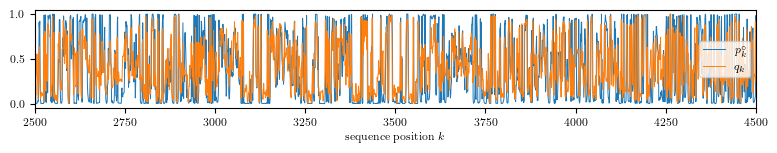

In [5]:
#filename = data_plots+f"/unpaired_{dataset_1.seq_id}.png"
start = 2500
end = 4500

plot.plot_unpaired(mir17HG,
                   #figure_path=filename,
                   plot_interval_start = start,
                   plot_interval_end = end,
                   grey=False
                   )

### 3.2 Pairing behavior dependencies

The stochastic sampling enables the computation of dependencies in the pairing behavior. For example joint and conditional probabilities and mutual information.

The plot below represents the joint paired probabilities between any two sequence positions, where the two sequence positions are represented by the x and y coordinates and the color indicates the probability (as shown in the scale below).

The same plot can be used to show different kind of pairwise dependencies, using the `what` flag. The different options are `joint_paired`, `joint_unpaired`, `cond_paired`, `cond_unpaired`, and `rnafold_bpp`. A sequence range of interest can be provided with the flags `start` and `end`, by default the full sequence is plotted.

In the context of conditional probabilities: If the condition is fullfilled with low probability then the conditional probabilities is computed based on a small sample of structures and is therefore noisy. Probabilities based of low probability conditions can be masked in color by providing a treshold on the marginal probability. 



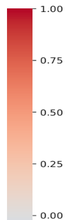

In [19]:
plot_heatmap = Image.open('data/test/heatmap_color.png').resize((75,220), Image.Resampling.LANCZOS)
plot_heatmap

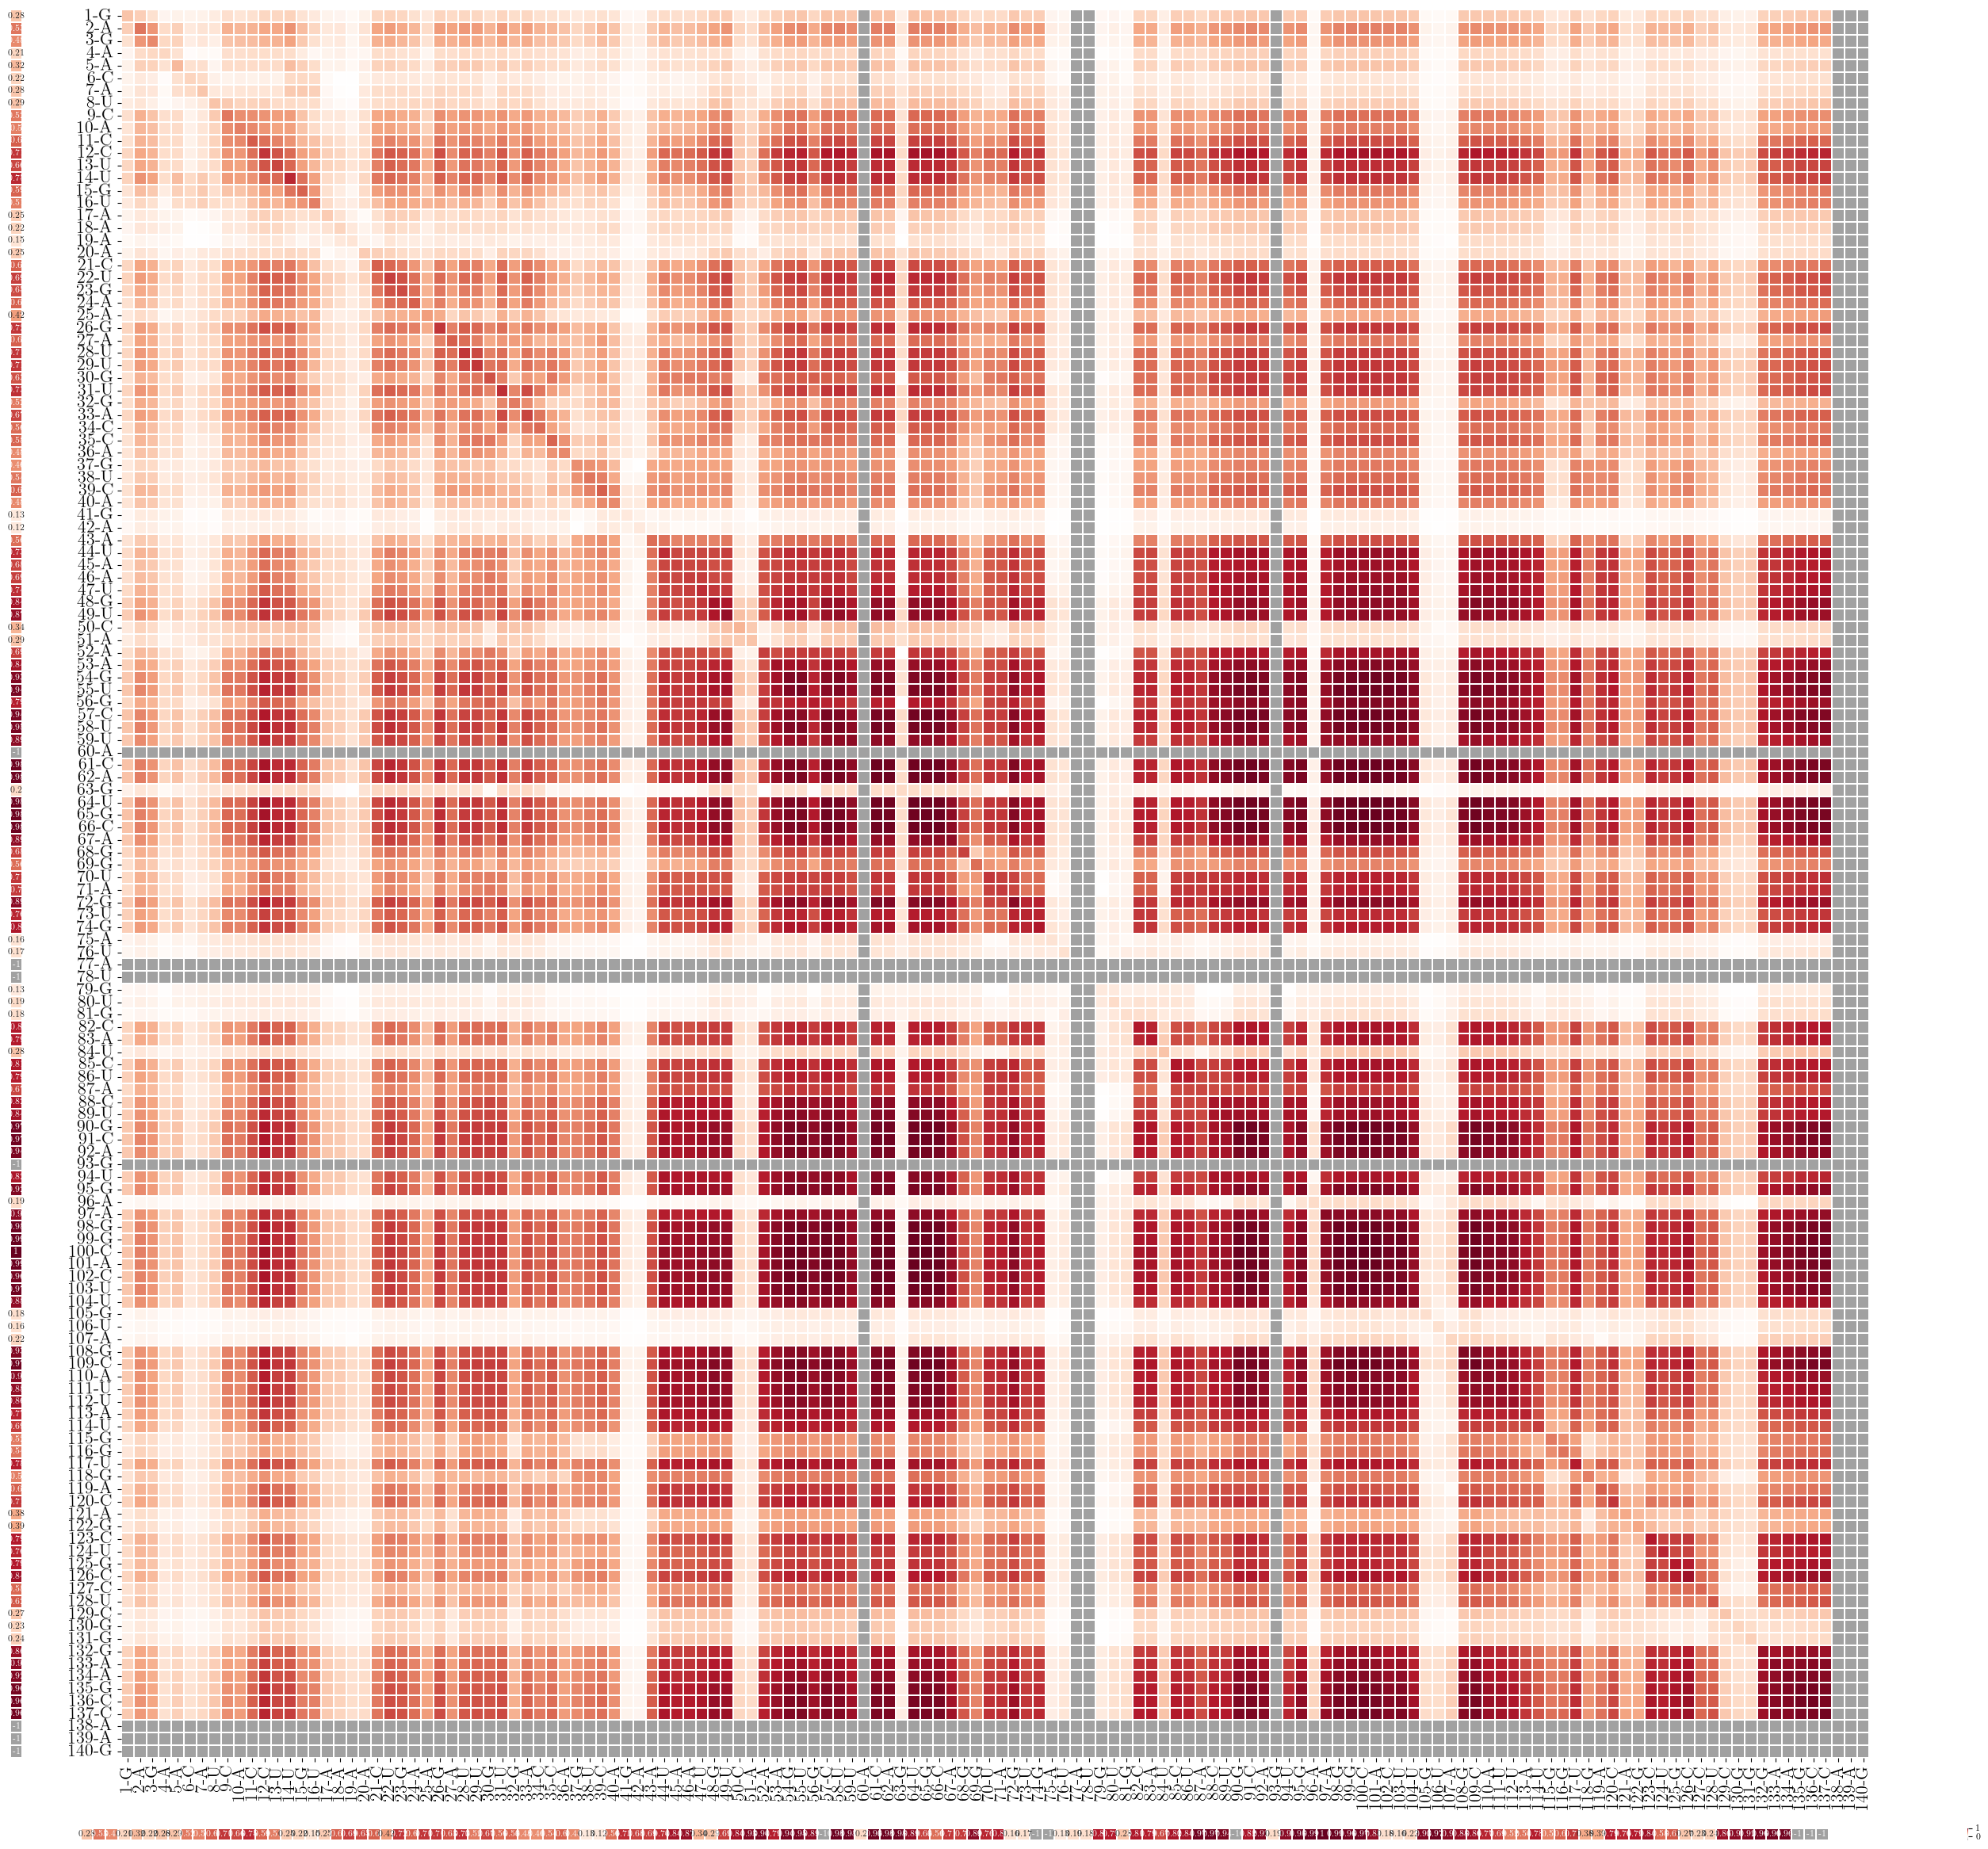

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [7]:
#filename = 'data/test/heatmap_color.pdf'
plot.heatmap_ij(mir17HG,
                start = 2750,
                end = 2890,
                #figure_path=filename,
                threshold=0.1,
                #grey=False,
                #what='joint_unpaired'
               )

### 3.3 Maximum expected accuracy (MEA)

Paired and unpaired probabilities are computed from the Boltzmann sampling. Those probabilities can then be used to compute the maximum expected accuracy (MEA) structure. 
The plot module allows the visualization of the MEA structure.

If only a subsequence is of interest the start and the end of the sequence can be provided as `start` and `end`. 
To plot the structural context of the subsequence we can provide the flag `context=True` , then the subsequence is modified such that all positions that pair with the defined subsequence are included. Otherwise, only the internal base pairs are shown.

The structue is stored into a file with the format: `struct_{seq_id}_{start}_{end}.eps`. Jupyter notebooks do not allow a good rendering of such files, therfore using an external tool to view the output file may be of advantage.

Positions to be annotated can be pass as an array to `plot.struct_ps` in order to higlight them on the MEA plot.

In [4]:
# Known mir17 start and end coordinates
annotations = [[2799, 2858], [2937, 3001], [3084, 3143], [3253, 3311], [3387, 3449], [3504, 3564]]

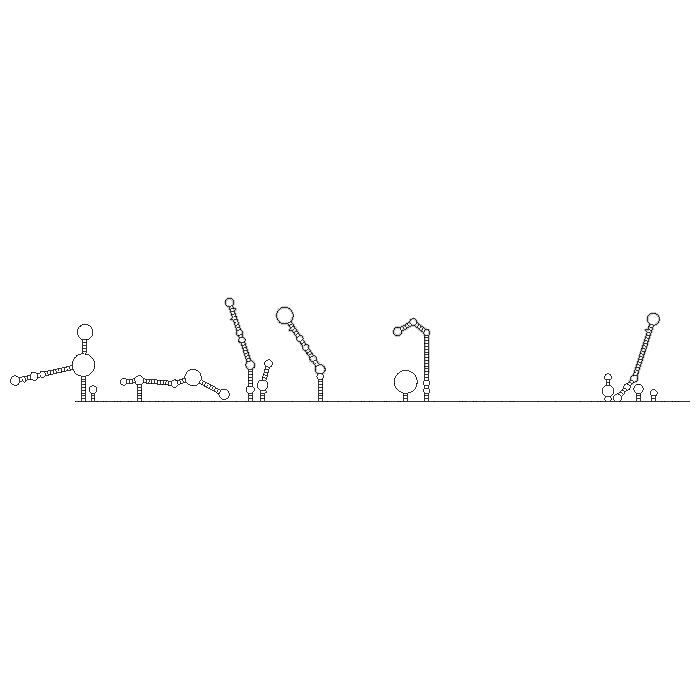

In [5]:
anno = annotations[:4]

start = 2501
end = 3361

plot.struct_ps(mir17HG, start, end, anno)
filename = f"struct_{mir17HG.seq_id}_{start}_{end}.eps"
plot_mea = Image.open(filename)
plot_mea


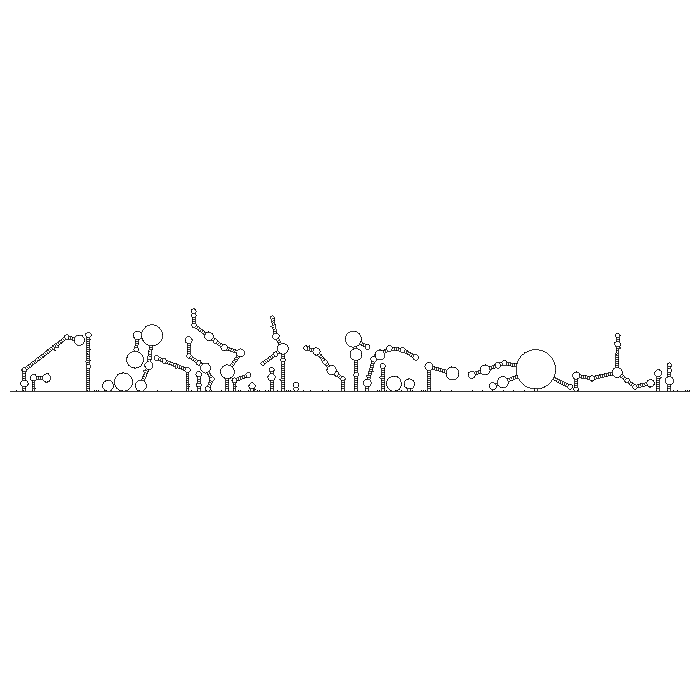

In [6]:
anno = annotations[4:]

start = 3362
end = 5001

plot.struct_ps(mir17HG, start, end, anno)
filename = f"struct_{mir17HG.seq_id}_{start}_{end}.eps"
plot_mea = Image.open(filename)
plot_mea

The plot below shows the differences between plotting the structural context or only the internal base pairs.

j=67 has been changed to 72
i=2 has been changed to 2


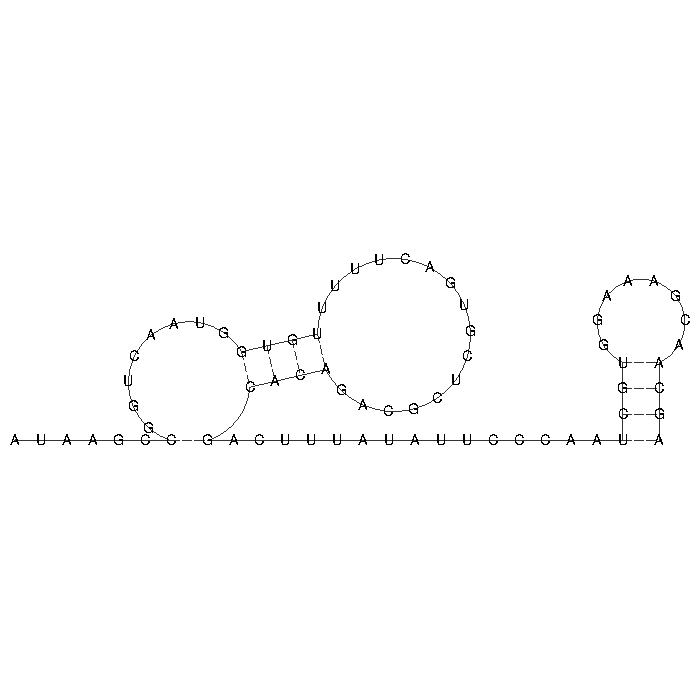

In [8]:
start = 2
end = 67

#plot.struct_ps(dataset_1, start, end)
#filename = f"struct_{dataset_1.seq_id}_{start}_{end}.eps"
plot.struct_ps(dataset_1, start, end, context=True)
filename = f"struct_{dataset_1.seq_id}_{start}_{end}_context.eps"
plot_mea = Image.open(filename)
plot_mea

## 4. Parameter evaluation

The screening of different parameter combinations can be used to optimize analysis settings to sepecific tasks.

### 4.1 Influence of window size on local folding results

The following step generates and compare the distribution of unpaired probability in dependency of the window size and in comparison to the global folding results.

In [9]:
# provide a list of window size of interest

windowlengths = [300, 350, 700]

In [10]:
data_dir = 'data/results'
#bpspan =  [w-20 for w in windowlengths]
bpspan =  [280, 320, 680]
nsample = 100

record = list(SeqIO.parse('data/sequences/mir71_NG_032702.1.fasta', "fasta"))
my_id = record[0].id
sequence = str(record[0].seq).replace('T', 'U')[4999:11756]
print(my_id, '\t', len(sequence))


data=[]
for w, w_len in enumerate(windowlengths):
    if len(bpspan) == len(windowlengths):
        span = bpspan[w]
    elif len(bpspan) == 1:
        span = bpspan[0]
    else:
        sys.exit('''Error: Parse one basepairspan valid for all windowlengths '''
            '''or the same number of basepairspans as windowlengths''')

    if span > w_len:
        sys.exit('Error: basepairspan must be <= windowlength')
    if w_len > len(sequence):
        sys.exit('Error: windowlength must be <= sequence length')

    data.append(PLfoldRevisited(seq_id=my_id,
                                sequence=sequence,
                                window_size=w_len,
                                num_samples=nsample,
                                max_bp_span = span,
                                data_dir=data_dir,
                                ))

NG_032702.1 	 6757


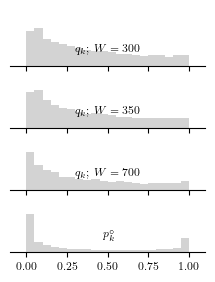

In [11]:
#filename = data_plots+f"/W_unpaired_{dataset_1.seq_id}.png"

plot.plot_unpaired_hist(data,
                        #figure_path=filename
                       )

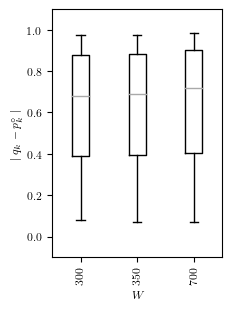

In [12]:
#filename = data_plots+f"/W_error_box_{x.seq_id}.png"

df_unpaired = plot.plot_error_vs_windowsize_boxplot(data,
                                                #figure_path=filename
                                                )


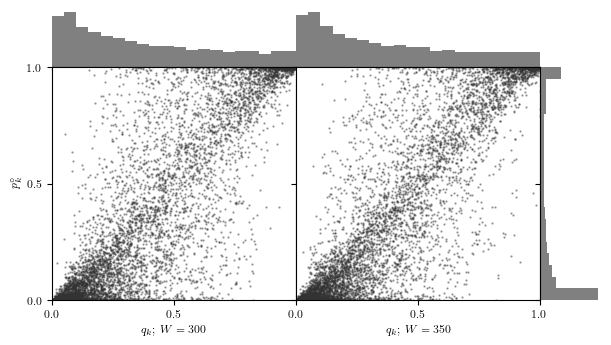

In [13]:
plot.plot_scatter_unpaired(data)

### 4.2 Relation between base pair span and window size



In [14]:
windowlengths = [300, 300, 300]
bpspan       =  [150, 250, 300]

In [15]:
data_dir = 'data/results'

nsample = 100

record = list(SeqIO.parse('data/sequences/mir71_NG_032702.1.fasta', "fasta"))
my_id = record[0].id
sequence = str(record[0].seq).replace('T', 'U')[4999:11756]
print(my_id, '\t', len(sequence))


data=[]
for w, w_len in enumerate(windowlengths):
    if len(bpspan) == len(windowlengths):
        span = bpspan[w]
    elif len(bpspan) == 1:
        span = bpspan[0]
    else:
        sys.exit('''Error: Parse one basepairspan valid for all windowlengths '''
            '''or the same number of basepairspans as windowlengths''')

    if span > w_len:
        sys.exit('Error: basepairspan must be <= windowlength')
    if w_len > len(sequence):
        sys.exit('Error: windowlength must be <= sequence length')

    #for nsample in nsamples:
    data.append(PLfoldRevisited(seq_id=my_id,
                                sequence=sequence,
                                window_size=w_len,
                                num_samples=nsample,
                                max_bp_span = span,
                                data_dir=data_dir,
                                #recalculate=True
                                ))

NG_032702.1 	 6757


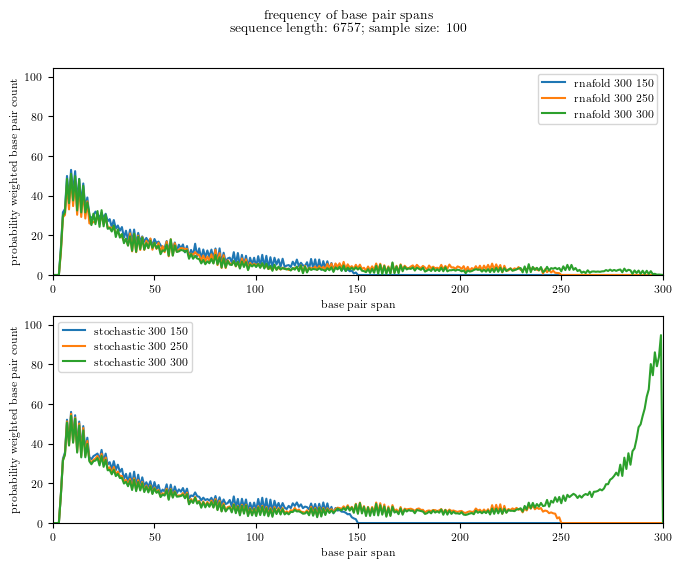

In [16]:
plot.plot_bp_span_hist(data)